In [63]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import os
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 
import xlwt

# linear model library

import statsmodels.api as sm  # linear regression utiliza todas las columnas de base de datos 
import statsmodels.formula.api as smf  # linear regression usa uan formula
from sklearn import datasets, linear_model # models 
from sklearn.metrics import mean_squared_error, r2_score
from linearmodels.iv import IV2SLS # for IV regression

import warnings
warnings.filterwarnings('ignore') # eliminar warning messages 


# Export latex table 

from pystout import pystout
from patsy import dmatrices

In [64]:
raw_data = pd.read_excel(r'../1. datos/data_papa_1997_mayo2021_grupos.xls')
dep_prov_code = pd.read_excel(r'../1. datos/psi_prov.xls')
senami = pd.read_excel(r'../1. datos/psi_senami.xlsx', sheet_name = 'Hoja2')

data_import = pd.read_excel(r'../1. datos/psi_prov.xls', sheet_name = 'Hoja1')

In [65]:
data_import 

,year,import
0,2005,16945
1,2006,19536
2,2007,13578
3,2008,23019
4,2009,20218
5,2010,21231
6,2011,22669
7,2012,36214
8,2013,35790
9,2014,40793


In [66]:
raw_data

,mm,year,nmes,variedad,provincia,volumen,precio
0,1997-01-01,1997,1,Papa Color,Concepcion,120.60,0.55
1,1997-01-01,1997,1,Papa Blanca,Ambo,33.72,0.56
2,1997-01-01,1997,1,Papa Blanca,Huanuco,2979.13,0.56
3,1997-01-01,1997,1,Papa Blanca,Andahuaylas,14.16,0.56
4,1997-01-01,1997,1,Papa Color,Junin,67.68,0.55
...,...,...,...,...,...,...,...
21328,2021-05-01,2021,5,Papa Yungay,Abancay,20.00,0.78
21329,2021-05-01,2021,5,Papa Blanca,Lima,893.00,0.79
21330,2021-05-01,2021,5,Papa Canchan,Jauja,24.00,1.38
21331,2021-05-01,2021,5,Papa Amarilla,Ambo,576.00,1.71


In [67]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21333 entries, 0 to 21332
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   mm         21333 non-null  datetime64[ns]
 1   year       21333 non-null  int64         
 2   nmes       21333 non-null  int64         
 3   variedad   21333 non-null  object        
 4   provincia  21333 non-null  object        
 5   volumen    21333 non-null  float64       
 6   precio     21333 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.1+ MB


In [68]:
dep_prov_code

,provincia,ubigeo
0,Abancay,3
1,Acobamba,9
2,Aija,2
3,Ambo,2
4,Andahuaylas,3
...,...,...
101,Vilcas Huaman,5
102,Viru,2
103,Yauli,12
104,Yauyos,15


In [69]:
dep_prov_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   provincia  106 non-null    object
 1   ubigeo     106 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [70]:
senami

,dep,ubigeo,1997,1998,1999,2000,2001,2002,2003,2004,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Amazonas,1,0.50,1.30,1.93,0.67,0.08,0.17,-0.79,-1.76,...,1.48,-0.35,0.34,0.85,-0.14,-0.14,0.47,-0.51,2.21,-0.72
1,Tacna,23,0.89,-0.03,1.52,0.97,1.65,0.74,-0.39,0.25,...,-0.14,-0.74,0.62,1.26,0.29,-0.96,0.84,-0.12,0.94,0.19
2,San Martin,22,-0.23,0.56,2.42,-0.13,0.14,-1.12,-0.68,-2.49,...,0.85,-1.21,0.21,0.03,1.28,0.73,1.43,-0.25,2.33,-0.54
3,Puno,21,1.15,-0.05,1.11,0.49,2.70,0.49,0.06,-0.54,...,-0.12,0.57,0.29,1.15,0.00,-0.72,0.52,-1.11,0.20,0.17
4,Piura,20,-0.69,2.89,0.46,0.05,0.94,0.56,-0.76,-1.21,...,0.71,0.18,-0.97,1.09,-0.32,-0.77,0.21,0.34,1.95,-1.19
5,Pasco,19,-0.13,0.60,1.95,0.84,1.43,-0.10,-0.19,-1.15,...,0.59,0.45,0.71,0.15,0.32,0.26,0.75,-1.00,0.47,-0.80
6,Moquegua,18,0.70,0.04,1.23,0.97,1.77,0.92,-0.33,0.31,...,-0.41,-0.66,0.75,1.39,0.27,-0.71,0.96,-0.50,1.18,-0.05
7,Lima,15,-1.01,1.25,0.95,0.93,1.29,-0.09,-0.17,-1.13,...,1.12,-0.53,0.42,0.41,0.24,0.21,0.31,-1.03,2.47,0.33
8,Lambayeque,14,-0.87,3.05,0.35,0.24,0.85,0.42,-0.69,-0.91,...,0.80,0.32,-0.77,0.94,-0.14,-0.77,0.65,0.37,2.25,-0.85
9,Junín,12,-0.26,0.96,1.39,1.15,1.24,0.31,-0.05,-1.02,...,0.21,0.60,1.18,0.76,0.31,0.35,1.20,-0.84,1.12,-0.14


In [71]:
senami = pd.melt(senami, id_vars = ['dep','ubigeo'],
                 value_vars = map(str, range(1997,2019)), var_name = 'year', value_name = 'spi')


In [72]:
senami['year'] = senami.year.astype('int64')
senami

,dep,ubigeo,year,spi
0,Amazonas,1,1997,0.50
1,Tacna,23,1997,0.89
2,San Martin,22,1997,-0.23
3,Puno,21,1997,1.15
4,Piura,20,1997,-0.69
...,...,...,...,...
435,Apurímac,3,2018,0.38
436,Ancash,2,2018,0.10
437,Tumbes,24,2018,-1.15
438,La Libertad,13,2018,-0.24


In [73]:
senami.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dep     440 non-null    object 
 1   ubigeo  440 non-null    int64  
 2   year    440 non-null    int64  
 3   spi     440 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 13.9+ KB


In [74]:
raw_data['month'] = raw_data.mm.dt.month
raw_data['year'] = raw_data.mm.dt.year

In [75]:
raw_data

,mm,year,nmes,variedad,provincia,volumen,precio,month
0,1997-01-01,1997,1,Papa Color,Concepcion,120.60,0.55,1
1,1997-01-01,1997,1,Papa Blanca,Ambo,33.72,0.56,1
2,1997-01-01,1997,1,Papa Blanca,Huanuco,2979.13,0.56,1
3,1997-01-01,1997,1,Papa Blanca,Andahuaylas,14.16,0.56,1
4,1997-01-01,1997,1,Papa Color,Junin,67.68,0.55,1
...,...,...,...,...,...,...,...,...
21328,2021-05-01,2021,5,Papa Yungay,Abancay,20.00,0.78,5
21329,2021-05-01,2021,5,Papa Blanca,Lima,893.00,0.79,5
21330,2021-05-01,2021,5,Papa Canchan,Jauja,24.00,1.38,5
21331,2021-05-01,2021,5,Papa Amarilla,Ambo,576.00,1.71,5


In [76]:
raw_data_2trim = raw_data[ ( raw_data.year.isin(range(1997,2020)) ) &\
                          (raw_data.variedad == "Papa Blanca")]

In [77]:
# Filtro de provincias 

raw_data_2trim = raw_data_2trim[~ raw_data_2trim.provincia.isin(['Sin Especificacion',
                                                                'Procedencia Desconocida',
                                                                'Camara Frigorifico',
                                                                ])]

In [78]:
raw_data_2trim.provincia.unique()

array(['Ambo', 'Huanuco', 'Andahuaylas', 'Callao', 'Huaral', 'Concepcion',
       'Pachitea', 'Huancayo', 'Oxapampa', 'Tayacaja', 'Huaura', 'Lima',
       'Canete', 'Huancavelica', 'Pasco', 'Barranca', 'Arequipa', 'Canta',
       'Ascope', 'Junin', 'Camana', 'Jauja', 'Tarma', 'Caylloma', 'Santa',
       'Huamanga', 'Sullana', 'Acobamba', 'Chincha', 'Castilla',
       'Trujillo', 'Abancay', 'Huari', 'Huarmey', 'Lambayeque',
       'Dos De Mayo', 'Tocache', 'Chiclayo', 'Daniel Alcides Carrion',
       'Pacasmayo', 'Nazca', 'Ica', 'Cajamarca', 'Chincheros', 'Caraveli',
       'Chanchamayo', 'Pisco', 'Palpa', 'Islay', 'Yauyos', 'Huarochiri',
       'Casma', 'Satipo', 'Huaraz', 'Carhuaz', 'Oyon', 'Yungay',
       'Cangallo', 'Huaylas', 'Paucartambo', 'Cotabambas', 'Cusco',
       'Churcampa', 'Jaen', 'Acomayo', 'Cajatambo', 'Lucanas',
       'Castrovirreyna', 'Aija', 'Antabamba', 'Bolognesi',
       'Leoncio Prado', 'Huanta', 'Huamalies', 'Yauli', 'Huaytara',
       'Mariscal Nieto', 'Angar

In [79]:
raw_data_2trim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7464 entries, 1 to 19670
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   mm         7464 non-null   datetime64[ns]
 1   year       7464 non-null   int64         
 2   nmes       7464 non-null   int64         
 3   variedad   7464 non-null   object        
 4   provincia  7464 non-null   object        
 5   volumen    7464 non-null   float64       
 6   precio     7464 non-null   float64       
 7   month      7464 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 524.8+ KB


In [80]:
raw_data_2trim = pd.merge(raw_data_2trim, dep_prov_code, on = 'provincia', how = 'left').merge(senami,
                                on = ['ubigeo','year'], how = 'left').merge(data_import, on = 'year', how = 'left')

In [81]:
raw_data_2trim

,mm,year,nmes,variedad,provincia,volumen,precio,month,ubigeo,dep,spi,import
0,1997-01-01,1997,1,Papa Blanca,Ambo,33.72,0.56,1,2.0,Ancash,-1.00,NaN
1,1997-01-01,1997,1,Papa Blanca,Huanuco,2979.13,0.56,1,10.0,Huánuco,-0.31,NaN
2,1997-01-01,1997,1,Papa Blanca,Andahuaylas,14.16,0.56,1,3.0,Apurímac,-0.04,NaN
3,1997-01-01,1997,1,Papa Blanca,Callao,258.24,0.56,1,15.0,Lima,-1.01,NaN
4,1997-01-01,1997,1,Papa Blanca,Huaral,7360.68,0.56,1,15.0,Lima,-1.01,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7459,2019-12-01,2019,12,Papa Blanca,Huanta,88.00,1.17,12,5.0,NaN,NaN,NaN
7460,2019-12-01,2019,12,Papa Blanca,Canta,66.00,1.17,12,15.0,NaN,NaN,NaN
7461,2019-12-01,2019,12,Papa Blanca,Pasco,884.00,1.17,12,19.0,NaN,NaN,NaN
7462,2019-12-01,2019,12,Papa Blanca,Huancavelica,120.00,1.17,12,9.0,NaN,NaN,NaN


In [82]:
raw_data_2trim.provincia.unique()

array(['Ambo', 'Huanuco', 'Andahuaylas', 'Callao', 'Huaral', 'Concepcion',
       'Pachitea', 'Huancayo', 'Oxapampa', 'Tayacaja', 'Huaura', 'Lima',
       'Canete', 'Huancavelica', 'Pasco', 'Barranca', 'Arequipa', 'Canta',
       'Ascope', 'Junin', 'Camana', 'Jauja', 'Tarma', 'Caylloma', 'Santa',
       'Huamanga', 'Sullana', 'Acobamba', 'Chincha', 'Castilla',
       'Trujillo', 'Abancay', 'Huari', 'Huarmey', 'Lambayeque',
       'Dos De Mayo', 'Tocache', 'Chiclayo', 'Daniel Alcides Carrion',
       'Pacasmayo', 'Nazca', 'Ica', 'Cajamarca', 'Chincheros', 'Caraveli',
       'Chanchamayo', 'Pisco', 'Palpa', 'Islay', 'Yauyos', 'Huarochiri',
       'Casma', 'Satipo', 'Huaraz', 'Carhuaz', 'Oyon', 'Yungay',
       'Cangallo', 'Huaylas', 'Paucartambo', 'Cotabambas', 'Cusco',
       'Churcampa', 'Jaen', 'Acomayo', 'Cajatambo', 'Lucanas',
       'Castrovirreyna', 'Aija', 'Antabamba', 'Bolognesi',
       'Leoncio Prado', 'Huanta', 'Huamalies', 'Yauli', 'Huaytara',
       'Mariscal Nieto', 'Angar

In [83]:
#data_excel = pd.DataFrame({'dep':raw_data_2trim.provincia.unique()})

In [84]:
#data_excel.to_excel(r'1. datos/psi_prov.xls')

In [85]:
raw_data_2trim.month.value_counts()

8     728
7     681
9     664
10    645
2     644
4     630
3     626
1     591
11    580
6     578
5     563
12    534
Name: month, dtype: int64

In [86]:
#raw_data_2trim.provincia.value_counts()

In [87]:
# variables en logaritmos 
raw_data_2trim['ln_price'] = np.log(raw_data_2trim.precio)

raw_data_2trim['ln_vol'] = np.log(raw_data_2trim.volumen)

In [88]:
raw_data_2trim

,mm,year,nmes,variedad,provincia,volumen,precio,month,ubigeo,dep,spi,import,ln_price,ln_vol
0,1997-01-01,1997,1,Papa Blanca,Ambo,33.72,0.56,1,2.0,Ancash,-1.00,NaN,-0.579818,3.518091
1,1997-01-01,1997,1,Papa Blanca,Huanuco,2979.13,0.56,1,10.0,Huánuco,-0.31,NaN,-0.579818,7.999387
2,1997-01-01,1997,1,Papa Blanca,Andahuaylas,14.16,0.56,1,3.0,Apurímac,-0.04,NaN,-0.579818,2.650421
3,1997-01-01,1997,1,Papa Blanca,Callao,258.24,0.56,1,15.0,Lima,-1.01,NaN,-0.579818,5.553889
4,1997-01-01,1997,1,Papa Blanca,Huaral,7360.68,0.56,1,15.0,Lima,-1.01,NaN,-0.579818,8.903908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7459,2019-12-01,2019,12,Papa Blanca,Huanta,88.00,1.17,12,5.0,NaN,NaN,NaN,0.157004,4.477337
7460,2019-12-01,2019,12,Papa Blanca,Canta,66.00,1.17,12,15.0,NaN,NaN,NaN,0.157004,4.189655
7461,2019-12-01,2019,12,Papa Blanca,Pasco,884.00,1.17,12,19.0,NaN,NaN,NaN,0.157004,6.784457
7462,2019-12-01,2019,12,Papa Blanca,Huancavelica,120.00,1.17,12,9.0,NaN,NaN,NaN,0.157004,4.787492


In [89]:
# Selcción de provincias 
total = raw_data_2trim[raw_data_2trim.year ==2005].volumen.sum()

raw_data_2trim[raw_data_2trim.year == 2005].groupby('dep').agg(total_dep = ( 'volumen', np.sum ))*(100/total)


,total_dep
dep,
Ancash,1.809928
Apurímac,3.408451
Arequipa,3.373449
Ayacucho,19.077244
Cajamarca,0.016816
Cusco,0.016940
Huancavelica,1.394447
Huánuco,14.934083
Junín,21.406949


In [90]:
# Selcción de provincias 
total = raw_data_2trim[raw_data_2trim.year ==2010].volumen.sum()

raw_data_2trim[raw_data_2trim.year == 2010].groupby('dep').agg(total_dep = ( 'volumen', np.sum ))*(100/total)


,total_dep
dep,
Ancash,4.891262
Apurímac,2.872130
Arequipa,1.768388
Ayacucho,13.903192
Cajamarca,0.014126
Cusco,0.002590
Huancavelica,0.818389
Huánuco,15.076388
Junín,23.343387


In [91]:
# Selcción de provincias 
total = raw_data_2trim[raw_data_2trim.year ==2015].volumen.sum()

raw_data_2trim[raw_data_2trim.year == 2015].groupby('dep').agg(total_dep = ( 'volumen', np.sum ))*(100/total)


,total_dep
dep,
Ancash,3.919281
Apurímac,3.292256
Arequipa,3.467124
Ayacucho,15.429562
Huancavelica,0.727449
Huánuco,21.472984
Junín,29.864877
La Libertad,1.166117
Lima,7.658699


In [92]:
# Selcción de provincias 
total = raw_data_2trim[raw_data_2trim.year ==2017].volumen.sum()

raw_data_2trim[raw_data_2trim.year == 2017].groupby('dep').agg(total_dep = ( 'volumen', np.sum ))*(100/total)


,total_dep
dep,
Ancash,9.443492
Apurímac,2.591122
Arequipa,3.717805
Ayacucho,13.010203
Huancavelica,0.867464
Huánuco,22.466022
Junín,30.857145
La Libertad,0.084880
Lima,6.110640


In [93]:
# se selecciona Lima, Junin, Pasco, arequipa , ayacucho y apirimac 

In [94]:
dataf = raw_data_2trim[raw_data_2trim.ubigeo.isin([12,10,5])]

In [95]:
dataf.dep.unique()

array(['Huánuco', 'Junín', 'Ayacucho', nan], dtype=object)

In [96]:
dataf.to_excel(r'../1. datos/data_clean.xls')

In [97]:
dataf.columns

Index(['mm', 'year', 'nmes', 'variedad', 'provincia', 'volumen', 'precio',
       'month', 'ubigeo', 'dep', 'spi', 'import', 'ln_price', 'ln_vol'],
      dtype='object')

# Linear Regression

In [98]:
dataf['trim1'] = np.where(dataf.month.isin(range(1,4)),1 ,0)
dataf['trim2'] = np.where(dataf.month.isin(range(4,7)),1 ,0)
dataf['trim3'] = np.where(dataf.month.isin(range(7,10)),1 ,0)
dataf['trim4'] = np.where(dataf.month.isin(range(10,13)),1 ,0)
dataf['ln_import'] = np.log(dataf['import'])
dataf['ln_import_lag'] = np.log(dataf['import'].shift(1))
dataf['spi_lag'] = dataf['spi'].shift(1)
dataf['id_province'] = dataf.groupby('provincia').ngroup()

In [99]:
dataf

,mm,year,nmes,variedad,provincia,volumen,precio,month,ubigeo,dep,...,ln_price,ln_vol,trim1,trim2,trim3,trim4,ln_import,ln_import_lag,spi_lag,id_province
1,1997-01-01,1997,1,Papa Blanca,Huanuco,2979.13,0.56,1,10.0,Huánuco,...,-0.579818,7.999387,1,0,0,0,NaN,NaN,NaN,11
5,1997-01-01,1997,1,Papa Blanca,Concepcion,79.44,0.56,1,12.0,Junín,...,-0.579818,4.375002,1,0,0,0,NaN,NaN,-0.31,3
6,1997-01-01,1997,1,Papa Blanca,Pachitea,978.36,0.56,1,10.0,Huánuco,...,-0.579818,6.885878,1,0,0,0,NaN,NaN,-0.26,20
7,1997-01-01,1997,1,Papa Blanca,Huancayo,1170.75,0.56,1,12.0,Junín,...,-0.579818,7.065400,1,0,0,0,NaN,NaN,-0.31,9
8,1997-01-01,1997,1,Papa Blanca,Oxapampa,10.20,0.56,1,12.0,Junín,...,-0.579818,2.322388,1,0,0,0,NaN,NaN,-0.26,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7449,2019-12-01,2019,12,Papa Blanca,Huanuco,9557.00,1.17,12,10.0,NaN,...,0.157004,9.165029,0,0,0,1,NaN,NaN,NaN,11
7450,2019-12-01,2019,12,Papa Blanca,Tarma,2867.00,1.17,12,12.0,NaN,...,0.157004,7.961021,0,0,0,1,NaN,NaN,NaN,25
7451,2019-12-01,2019,12,Papa Blanca,Huancayo,4446.00,1.17,12,12.0,NaN,...,0.157004,8.399760,0,0,0,1,NaN,NaN,NaN,9
7453,2019-12-01,2019,12,Papa Blanca,Huamanga,324.00,1.17,12,5.0,NaN,...,0.157004,5.780744,0,0,0,1,NaN,NaN,NaN,7


In [100]:
dataf['import'].value_counts()

13578.0    155
19536.0    148
23019.0    147
20218.0    139
22669.0    134
21231.0    133
16945.0    132
35790.0    131
52938.0    131
36214.0    127
50398.0    118
40793.0    116
50811.0    114
Name: import, dtype: int64

In [101]:
len(dataf.provincia.unique())

30

In [102]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2911 entries, 1 to 7459
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   mm             2911 non-null   datetime64[ns]
 1   year           2911 non-null   int64         
 2   nmes           2911 non-null   int64         
 3   variedad       2911 non-null   object        
 4   provincia      2911 non-null   object        
 5   volumen        2911 non-null   float64       
 6   precio         2911 non-null   float64       
 7   month          2911 non-null   int64         
 8   ubigeo         2911 non-null   float64       
 9   dep            2777 non-null   object        
 10  spi            2777 non-null   float64       
 11  import         1725 non-null   float64       
 12  ln_price       2911 non-null   float64       
 13  ln_vol         2911 non-null   float64       
 14  trim1          2911 non-null   int32         
 15  trim2          2911 n

In [103]:
# Modelos base

formula_model1 = "precio ~ ln_vol"

ols_model1 = smf.ols(formula_model1, data=dataf).fit(cov_type='cluster', cov_kwds={'groups': dataf['ubigeo']})

print(ols_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1873
Date:                Mon, 20 Mar 2023   Prob (F-statistic):              0.707
Time:                        22:52:45   Log-Likelihood:                -438.73
No. Observations:                2911   AIC:                             881.5
Df Residuals:                    2909   BIC:                             893.4
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7160      0.003    221.436      0.0

In [104]:
# Modelo 2

formula_model2 = "precio ~ ln_vol + C(nmes)"

ols_model2 = smf.ols(formula_model2, data=dataf).fit(cov_type='cluster', cov_kwds={'groups': dataf['ubigeo']})

print(ols_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 precio   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                    0.9429
Date:                Mon, 20 Mar 2023   Prob (F-statistic):              0.515
Time:                        22:52:45   Log-Likelihood:                -398.98
No. Observations:                2911   AIC:                             824.0
Df Residuals:                    2898   BIC:                             901.6
Df Model:                          12                                         
Covariance Type:              cluster                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.6916      0.018     38.116

In [105]:
# Modelo 3

formula_model3 = "ln_price ~ ln_vol + C(nmes) + C(year)"

ols_model3 = smf.ols(formula_model3, data=dataf).fit(cov_type='cluster', cov_kwds={'groups': dataf['ubigeo']})

print(ols_model3.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                 1.633e+15
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           6.12e-16
Time:                        22:52:45   Log-Likelihood:                 384.74
No. Observations:                2911   AIC:                            -699.5
Df Residuals:                    2876   BIC:                            -490.3
Df Model:                          34                                         
Covariance Type:              cluster                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.5193      0.005   -1

In [106]:
# Modelos completo

formula_model5 = "ln_price ~ ln_vol + C(nmes) + C(year) + C(id_province)"

ols_model5 = smf.ols(formula_model5, data=dataf).fit(cov_type='cluster', cov_kwds={'groups': dataf['ubigeo']})

print(ols_model5.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                 9.647e+15
Date:                Mon, 20 Mar 2023   Prob (F-statistic):           1.04e-16
Time:                        22:52:45   Log-Likelihood:                 396.54
No. Observations:                2911   AIC:                            -665.1
Df Residuals:                    2847   BIC:                            -282.6
Df Model:                          63                                         
Covariance Type:              cluster                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.5228 

In [107]:
# Modelos completo

formula_model6 = "ln_price ~ ln_vol + C(nmes) + year + C(id_province)"

ols_model6 = smf.ols(formula_model6, data=dataf).fit(cov_type='cluster', cov_kwds={'groups': dataf['ubigeo']})

print(ols_model6.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     11.48
Date:                Mon, 20 Mar 2023   Prob (F-statistic):             0.0801
Time:                        22:52:46   Log-Likelihood:                -603.96
No. Observations:                2911   AIC:                             1294.
Df Residuals:                    2868   BIC:                             1551.
Df Model:                          42                                         
Covariance Type:              cluster                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -59.5437 

In [108]:
dataf

,mm,year,nmes,variedad,provincia,volumen,precio,month,ubigeo,dep,...,ln_price,ln_vol,trim1,trim2,trim3,trim4,ln_import,ln_import_lag,spi_lag,id_province
1,1997-01-01,1997,1,Papa Blanca,Huanuco,2979.13,0.56,1,10.0,Huánuco,...,-0.579818,7.999387,1,0,0,0,NaN,NaN,NaN,11
5,1997-01-01,1997,1,Papa Blanca,Concepcion,79.44,0.56,1,12.0,Junín,...,-0.579818,4.375002,1,0,0,0,NaN,NaN,-0.31,3
6,1997-01-01,1997,1,Papa Blanca,Pachitea,978.36,0.56,1,10.0,Huánuco,...,-0.579818,6.885878,1,0,0,0,NaN,NaN,-0.26,20
7,1997-01-01,1997,1,Papa Blanca,Huancayo,1170.75,0.56,1,12.0,Junín,...,-0.579818,7.065400,1,0,0,0,NaN,NaN,-0.31,9
8,1997-01-01,1997,1,Papa Blanca,Oxapampa,10.20,0.56,1,12.0,Junín,...,-0.579818,2.322388,1,0,0,0,NaN,NaN,-0.26,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7449,2019-12-01,2019,12,Papa Blanca,Huanuco,9557.00,1.17,12,10.0,NaN,...,0.157004,9.165029,0,0,0,1,NaN,NaN,NaN,11
7450,2019-12-01,2019,12,Papa Blanca,Tarma,2867.00,1.17,12,12.0,NaN,...,0.157004,7.961021,0,0,0,1,NaN,NaN,NaN,25
7451,2019-12-01,2019,12,Papa Blanca,Huancayo,4446.00,1.17,12,12.0,NaN,...,0.157004,8.399760,0,0,0,1,NaN,NaN,NaN,9
7453,2019-12-01,2019,12,Papa Blanca,Huamanga,324.00,1.17,12,5.0,NaN,...,0.157004,5.780744,0,0,0,1,NaN,NaN,NaN,7


# Simulation case

In [109]:
y , X = dmatrices("ln_price ~ nmes + year + id_province + nmes + year + volumen + precio", 
        data = dataf, return_type='dataframe')

In [110]:
X_pre = X[ (X.nmes.isin([4,5,6])) & ( X.year.isin([2015,2016,2017,2018,2019] ) )]

In [111]:
X_pre

,Intercept,nmes,year,id_province,volumen,precio
5981,1.0,4.0,2015.0,0.0,17.0,0.82
5983,1.0,4.0,2015.0,25.0,4241.0,0.82
5986,1.0,4.0,2015.0,12.0,2312.0,0.82
5987,1.0,4.0,2015.0,2.0,68.0,0.82
5989,1.0,4.0,2015.0,4.0,225.0,0.82
...,...,...,...,...,...,...
7294,1.0,6.0,2019.0,10.0,735.0,1.03
7295,1.0,6.0,2019.0,29.0,19.0,1.03
7297,1.0,6.0,2019.0,0.0,275.0,1.03
7299,1.0,6.0,2019.0,14.0,72.0,1.03


In [112]:
X_pre['volumen2'] = X_pre.volumen*0.15  # 15% increase 
X_pre['ln_vol'] = np.log(X_pre['volumen2'])
del X_pre['volumen']

In [113]:
X_pre

,Intercept,nmes,year,id_province,precio,volumen2,ln_vol
5981,1.0,4.0,2015.0,0.0,0.82,34.0,3.526361
5983,1.0,4.0,2015.0,25.0,0.82,8482.0,9.045702
5986,1.0,4.0,2015.0,12.0,0.82,4624.0,8.439015
5987,1.0,4.0,2015.0,2.0,0.82,136.0,4.912655
5989,1.0,4.0,2015.0,4.0,0.82,450.0,6.109248
...,...,...,...,...,...,...,...
7294,1.0,6.0,2019.0,10.0,1.03,1470.0,7.293018
7295,1.0,6.0,2019.0,29.0,1.03,38.0,3.637586
7297,1.0,6.0,2019.0,0.0,1.03,550.0,6.309918
7299,1.0,6.0,2019.0,14.0,1.03,144.0,4.969813


In [114]:
# prediction

X_pre['price_predict'] = np.exp(ols_model5.predict(X_pre))

In [115]:
X_pre['year'] = X_pre['year'].astype(int) 

In [116]:
X_pre

,Intercept,nmes,year,id_province,precio,volumen2,ln_vol,price_predict
5981,1.0,4.0,2015,0.0,0.82,34.0,3.526361,0.897875
5983,1.0,4.0,2015,25.0,0.82,8482.0,9.045702,0.895565
5986,1.0,4.0,2015,12.0,0.82,4624.0,8.439015,0.901109
5987,1.0,4.0,2015,2.0,0.82,136.0,4.912655,0.895863
5989,1.0,4.0,2015,4.0,0.82,450.0,6.109248,0.893499
...,...,...,...,...,...,...,...,...
7294,1.0,6.0,2019,10.0,1.03,1470.0,7.293018,1.151687
7295,1.0,6.0,2019,29.0,1.03,38.0,3.637586,1.210755
7297,1.0,6.0,2019,0.0,1.03,550.0,6.309918,1.163982
7299,1.0,6.0,2019,14.0,1.03,144.0,4.969813,1.178160


In [117]:
data_1 = X_pre[['year','price_predict']]
data_1.rename(columns = {'price_predict':'precio'}, inplace = True)
data_1['estado'] = 'LR price predicction'
data_2 = X_pre[['year','precio']]
data_2['estado'] = 'Real price'

data_plot = pd.concat([data_1, data_2
                      ])

data_plot

,year,precio,estado
5981,2015,0.897875,LR price predicction
5983,2015,0.895565,LR price predicction
5986,2015,0.901109,LR price predicction
5987,2015,0.895863,LR price predicction
5989,2015,0.893499,LR price predicction
...,...,...,...
7294,2019,1.030000,Real price
7295,2019,1.030000,Real price
7297,2019,1.030000,Real price
7299,2019,1.030000,Real price


# Plots 

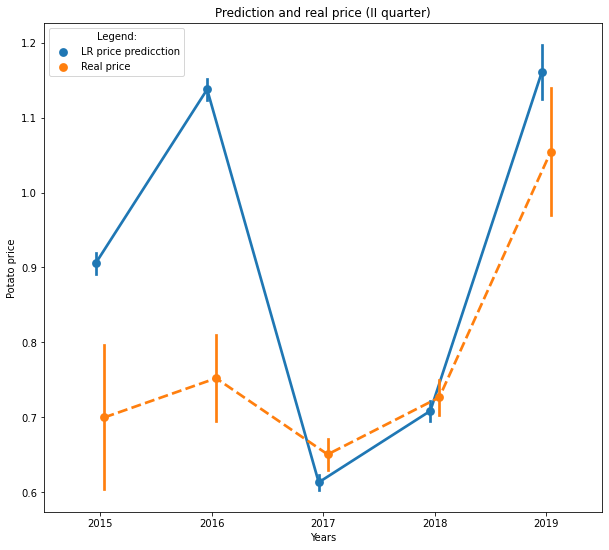

In [118]:
# Plot ploints
fig = plt.figure( figsize = ( 10, 9 ) )

sns.pointplot( x = "year", y = "precio", 
               data = data_plot, ci = 'sd',  hue = 'estado',
             dodge = 0.08, linestyles = [ "-", "--" ] )


# x label
plt.xlabel( "Years" )
plt.ylabel( "Potato price" )

# Change legend title
plt.legend( title =  "Legend:" )
plt.title( 'Prediction and real price (II quarter)' )

plt.savefig('plot_bins.png', format='png')

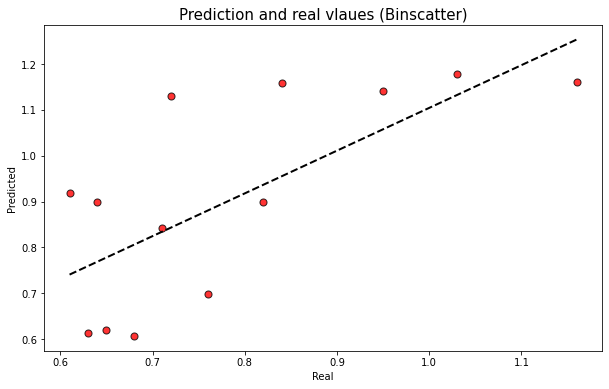

In [119]:
# Bin scatter plot 

f, ax = plt.subplots(figsize=(10, 6))

ax = sns.regplot(
    X_pre.precio, X_pre.price_predict, x_bins=40, 
    order=1, x_estimator=np.mean, fit_reg=True, ci=None, 
    line_kws={'lw':2,'color':'black', 'linestyle':'--'},
    scatter_kws ={'edgecolors':(0, 0, 0), 'alpha':0.8, 'color':'red'}
    
)

plt.title('Prediction and real vlaues (Binscatter)', fontsize= 15)
ax.set_xlabel('Real')
ax.set_ylabel('Predicted')
plt.show()

f.savefig('sccater.png', format='png')

# Export regression models 

In [120]:
# Lista de explicativa a mostrarse en la tabla

explicativas = ['ln_vol','C(nmes)[T.4]','C(nmes)[T.5]','C(nmes)[T.6]']

# etiquetas a las variables 

etiquetas = ['Potato production (log)', 'Dummy April','Dummy May','Dummy June']


labels = dict(zip(explicativas,etiquetas))
labels 

{'ln_vol': 'Potato production (log)',
 'C(nmes)[T.4]': 'Dummy April',
 'C(nmes)[T.5]': 'Dummy May',
 'C(nmes)[T.6]': 'Dummy June'}

In [123]:
pystout(models = [ols_model1,ols_model2,ols_model3,ols_model5, ols_model6], file='regression_table.tex', digits=3,
        endog_names=['Model 1','Model 2','Model 3','Model 4', 'Model 5'],
        exogvars =explicativas ,  # sellecionamos las variables 
        varlabels = labels,  # etiquetas a las variables
        mgroups={'Dependent Variable: Potato price (log)':[1,5]}, # titulo a las regresiones
        modstat={'nobs':'Observarions','rsquared':'R\sym{2}'}, # estadísticos 
        addrows={'Month fixed effects' : ['No','Yes','Yes','Yes','Yes'],
                 'Year fixed effects':['No','No','Yes','Yes','No'],
                 'Province fixed effects': ['No','No','No','Yes','Yes'],
                'Time trend': ['No','No','No','No','Yes']}, # añadimos filas 
        addnotes=['Note.—Huber robust standard errors are in parentheses.',
                  'Regression disturbance terms are clustered at the Region level.',
                 'Rest of dummies by month, year and province fixed effects not reported',
                 '* Significantly different from zero at 90 percent confidence.',
                 '** Significantly different from zero at 95 percent confidence.',
                 '*** Significantly different from zero at 99 percent confidence.'],
        title='Potato Market modelling (Linear regression)',
        stars={.1:'*',.05:'**',.01:'***'}
       )